# Dermatology Disease Prediction Project

**Objective:** To build a predictive model to classify 6 types of dermatological diseases based on clinical and histopathological features.

**Dataset:** UCI Dermatology Dataset from Kaggle.
[Link: https://www.kaggle.com/datasets/olcaybolat1/dermatology-dataset-classification](https://www.kaggle.com/datasets/olcaybolat1/dermatology-dataset-classification)

**Classes:**
1. Psoriasis
2. Seborrheic Dermatitis
3. Lichen Planus
4. Pityriasis Rosea
5. Chronic Dermatitis
6. Pityriasis Rubra Pilaris

**Approach:** This notebook covers data loading, preprocessing, exploratory data analysis (EDA), feature engineering (if any), dimensionality reduction (PCA), model training (Logistic Regression, Random Forest, SVC), hyperparameter tuning (GridSearchCV for RF), and evaluation.

In [1]:
 #import numpy, pandas, scipy.stats, matplotlib, seaborn
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
#DATA PREPROCESSING AND CLEANING
df = pd.read_csv('dermatology_database_1.csv')
df.head()


,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


In [34]:
df.shape

(366, 36)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 36 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           366 non-null    int64  
 1   erythema                             366 non-null    int64  
 2   scaling                              366 non-null    int64  
 3   definite_borders                     366 non-null    int64  
 4   itching                              366 non-null    int64  
 5   koebner_phenomenon                   366 non-null    int64  
 6   polygonal_papules                    366 non-null    int64  
 7   follicular_papules                   366 non-null    int64  
 8   oral_mucosal_involvement             366 non-null    int64  
 9   knee_and_elbow_involvement           366 non-null    int64  
 10  scalp_involvement                    366 non-null    int64  
 11  family_history                  

The dataset was been sourced from Kaggle, found @ [Link: https://www.kaggle.com/datasets/olcaybolat1/dermatology-dataset-classification](https://www.kaggle.com/datasets/olcaybolat1/dermatology-dataset-classification)
<br> This data has 35 features and 366 rows, with all of them of datatype integer, with most of them being ordinal.

On checking the raw data , ages for some of the subjects were not recorded, instead were collected as '?', imputing the missing ages with median age to avoid skewness

In [3]:
#Handling inconsistency in 'age' column, by first replacing '?' with NaNs'
df['age'] = df['age'].replace('?', np.nan)
df['age'].sample(20)

17     38
296    19
310    50
131    40
242    60
43     35
339    51
159    47
270    62
156    55
323    62
85     30
130    55
294    34
102    43
221    42
72     52
245    27
165    55
325    46
Name: age, dtype: object

In [4]:
df['age'] = pd.to_numeric(df['age'], errors = 'coerce') #Converting age to numeric
df['age'] = df['age'].fillna(df['age'].median()) #Imputing with median age
df['age'].sample(20)

102    43.0
261    36.0
218    45.0
246    55.0
224    36.0
253    27.0
140    20.0
362    36.0
149    45.0
157    32.0
236    35.0
43     35.0
252    36.0
119     0.0
39     46.0
49     60.0
44     30.0
30     50.0
195    22.0
95     18.0
Name: age, dtype: float64

In [5]:
#Checking for duplicates
print('Duplicate Rows : ', df.duplicated().sum())

Duplicate Rows :  0


There are no duplicates found.

In [6]:
#Chekcing age outliers(Analysing Descriptive statistics of age) using IQR method:
print('Age stats:\n ', df['age'].describe())


Age stats:
  count    366.000000
mean      36.267760
std       15.156875
min        0.000000
25%       25.000000
50%       35.000000
75%       48.000000
max       75.000000
Name: age, dtype: float64


There is almost no skewness found.

In [41]:
#USing quantile functions to find the IQR & Identifying outliers(if any) using 1.5 IQR rule
q1  = df['age'].quantile(0.25)
q3 = df['age'].quantile(0.75)
iqr = (q3-q1)


In [8]:
#Identifying Outliers using IQR and 1.5 IQR rules
lower_threshold , upper_threshold = q1-(1.5*iqr) , q3 + (1.5*iqr)
print(f"Lower Outlier Threshold : {lower_threshold} \nUpper Outlier Threshold : {upper_threshold}")

outliers = df[(df['age'] < lower_threshold) | (df['age'] > upper_threshold)]
if len(outliers) == 0:
    print("No Outliers detected")
else:
    print(f"Found {len(outliers)} outliers")

Lower Outlier Threshold : -9.5 
Upper Outlier Threshold : 82.5
No Outliers detected


Based on the IQR results attained above, we have no outliers

In [9]:
#Save the Cleaned Dataset
df.to_csv('dermatology_cleaned.csv', index = True)

The Cleaned dataset is saved.

In [10]:
#EDA and STATISTICAL ANALYSIS
#Loading the cleaned dataset.
df = pd.read_csv('dermatology_cleaned.csv')

#Descriptive Statistics
pd.set_option('display.max_columns', None)
df.describe()

,Unnamed: 0,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_infiltrate,PNL_infiltrate,fibrosis_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_rete_ridges,elongation_rete_ridges,thinning_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,182.500000,2.068306,1.795082,1.549180,1.366120,0.633880,0.448087,0.166667,0.377049,0.614754,0.519126,0.125683,0.404372,0.139344,0.546448,0.336066,1.368852,1.956284,0.527322,1.289617,0.663934,0.991803,0.633880,0.295082,0.363388,0.393443,0.464481,0.456284,0.953552,0.453552,0.103825,0.114754,1.866120,0.554645,36.267760,2.803279
std,105.799338,0.664753,0.701527,0.907525,1.138299,0.908016,0.957327,0.570588,0.834147,0.982979,0.905639,0.331946,0.869818,0.411790,0.815451,0.853139,1.104418,0.712512,0.757116,0.917562,1.056829,1.162161,1.034924,0.670578,0.759721,0.849406,0.864899,0.954873,1.130172,0.954744,0.450433,0.488723,0.726108,1.105908,15.156875,1.597803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,91.250000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,25.000000,1.000000
50%,182.500000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,35.000000,3.000000
75%,273.750000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,48.000000,4.000000
max,365.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,75.000000,6.000000



Analysing Descriptive Statistics

####Step1 : The count row for all features is 366, matching the total number of patient observations, indicating no missing values in this dataset.:
Step2 : Analysing 'Mean' and 'Median(50%)':
Analyzing each Attribute :
Erythema - All goodFor 'erythema' (mean 2.07, median 2), the mean and median are very close, suggesting a relatively symmetrical distribution around a score of 2. This indicates that a score of 2 is common for erythema in this patient cohort, but some variability exists.

Definitive Borders : For 'definite_borders', the median is 2 while the mean is 1.55. This indicates a left skew in the distribution, where a larger proportion of patients have higher scores (around 2 or 3), pulling the mean slightly lower. The standard deviation of 0.9 suggests a moderate spread around the mean within the 0-3 scoring range, indicating some variability in the presence and intensity of definite borders.

Itching - the median is 1 and the mean is 1.37. The positive difference suggests a right-skewed distribution, where the majority of patients experience less itching (scores around 1), but a tail of patients reports higher itching scores. The standard deviation of 1.37 is **relatively large**, indicating substantial variability in itching severity across the patient population, ranging from no itching (score 0) to severe itching (score 3).

koebner_phenomenon - the median is 0 and the mean is 0.63. This signifies a strong right-skewed distribution. The majority of patients do not exhibit the Koebner phenomenon (score 0), but some patients do, pulling the mean upwards. The standard deviation of 0.9, while moderate, reflects the fact that scores are concentrated at 0, but there's a spread towards higher scores among those who exhibit the phenomenon (up to score 3).

Polygonal_Papules (0 & 0.45), knee & Elbow inviolvement (0 & 0.6), disapperance_granular_layer (0 & 0.5), vacuolisation_damage_basal_layer(0 & 0.45), spongiosis(0 & 0.95), saw_tooth_appearance_retes(0 & 0.45), band_like_infiltrate(0 & 0.55)


In [11]:
#Dividing the Clinical and Histopathlogical Features(Used GPT 4 to categorise the features)
clinical_features = [
    'erythema', 'scaling', 'definite_borders', 'itching', 'koebner_phenomenon',
    'polygonal_papules', 'follicular_papules', 'oral_mucosal_involvement',
    'knee_and_elbow_involvement', 'scalp_involvement'
]

histo_epidermal_features = [
    'exocytosis', 'acanthosis', 'hyperkeratosis', 'parakeratosis',
    'clubbing_rete_ridges', 'elongation_rete_ridges',
    'thinning_suprapapillary_epidermis', 'spongiform_pustule',
    'munro_microabcess', 'focal_hypergranulosis',
    'disappearance_granular_layer', 'vacuolisation_damage_basal_layer',
    'spongiosis', 'saw_tooth_appearance_retes', 'follicular_horn_plug',
    'perifollicular_parakeratosis', 'melanin_incontinence'
]

histo_dermal_features = [
    'eosinophils_infiltrate', 'PNL_infiltrate',
    'fibrosis_papillary_dermis', 'inflammatory_mononuclear_infiltrate',
    'band_like_infiltrate'
]

additional_features = ['family_history', 'age']
all_features = clinical_features + histo_epidermal_features + histo_dermal_features + additional_features
df

,Unnamed: 0,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_infiltrate,PNL_infiltrate,fibrosis_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_rete_ridges,elongation_rete_ridges,thinning_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
0,0,2,2,0,3,0,0,0,0,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,55.0,2
1,1,3,3,3,2,1,0,0,0,1,1,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,8.0,1
2,2,2,1,2,3,1,3,0,3,0,0,0,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,26.0,3
3,3,2,2,2,0,0,0,0,0,3,2,0,0,0,3,0,0,2,0,3,2,2,2,2,0,0,3,0,0,0,0,0,3,0,40.0,1
4,4,2,3,2,2,2,2,0,2,0,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0,2,2,3,2,3,0,0,2,3,45.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,361,2,1,1,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,25.0,4
362,362,3,2,1,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,1,0,1,0,0,0,2,0,36.0,4
363,363,3,2,2,2,3,2,0,2,0,0,0,2,2,0,0,3,3,0,0,0,0,0,0,0,3,0,3,0,3,0,0,2,3,28.0,3
364,364,2,1,3,1,2,3,0,2,0,0,0,2,0,0,0,3,2,0,0,0,0,0,0,0,3,0,2,0,1,0,0,2,3,50.0,3


Class code:          Class:                     Number of instances:
       1             psoriasis			                112
       2             seboreic dermatitis                 61
       3             lichen planus                       72
       4             pityriasis rosea                    49
       5             cronic dermatitis                   52
       6             pityriasis rubra pilaris            20

In [12]:
print("Class distribution:")
class_counts = df['class'].value_counts().sort_index()

class_names = {1: 'Psoriasis', 2: 'Seborrheic Dermatitis', 3: 'Lichen Planus',
               4: 'Pityriasis Rosea', 5: 'Chronic Dermatitis', 6: 'Pityriasis Rubra Pilaris'}

for class_id, count in class_counts.items():
    print(f"Class {class_id} ({class_names[class_id]}): {count} samples ({count/len(df)*100:.1f}%)")

df.groupby('class').count()

Class distribution:
Class 1 (Psoriasis): 112 samples (30.6%)
Class 2 (Seborrheic Dermatitis): 61 samples (16.7%)
Class 3 (Lichen Planus): 72 samples (19.7%)
Class 4 (Pityriasis Rosea): 49 samples (13.4%)
Class 5 (Chronic Dermatitis): 52 samples (14.2%)
Class 6 (Pityriasis Rubra Pilaris): 20 samples (5.5%)


,Unnamed: 0,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_infiltrate,PNL_infiltrate,fibrosis_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_rete_ridges,elongation_rete_ridges,thinning_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age
class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112
2,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61
3,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72
4,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49
5,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52
6,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20


From the results obtained from the distributions of 6 classes in the dataset, we see that there is an Imbalance in them, which could lead to biased model, balancing them using 'stratify' can lead to a good model.

In [13]:
all_features = clinical_features + histo_epidermal_features + histo_dermal_features + additional_features

In [14]:
# Feature importance analysis using individual statistical tests

from scipy.stats import f_oneway

# Test each feature individually
feature_discrimination = []
for feature in all_features:
    groups = []
    for class_id in range(1, 7):
        class_data = df[df['class'] == class_id][feature].dropna()
        if len(class_data) > 0:
            groups.append(class_data.values)

    if len(groups) > 1:
        try:
            stat, pval = f_oneway(*groups)
            feature_discrimination.append((feature, stat, pval))
        except:
            continue

# Sort by F-statistic (higher = more discriminative)
feature_discrimination.sort(key=lambda x: x[1], reverse=True)

print("Top 10 most discriminative features:")
for i, (feature, f_stat, p_val) in enumerate(feature_discrimination[:20]):
    print(f"{i+1}. {feature}: F={f_stat:.2f}, p={p_val:.2e}")

Top 10 most discriminative features:
1. band_like_infiltrate: F=1201.97, p=4.14e-222
2. vacuolisation_damage_basal_layer: F=840.17, p=5.21e-196
3. saw_tooth_appearance_retes: F=730.39, p=5.41e-186
4. perifollicular_parakeratosis: F=719.19, p=6.78e-185
5. polygonal_papules: F=627.24, p=3.02e-175
6. melanin_incontinence: F=553.69, p=1.45e-166
7. fibrosis_papillary_dermis: F=483.22, p=3.09e-157
8. focal_hypergranulosis: F=455.62, p=2.95e-153
9. oral_mucosal_involvement: F=368.62, p=3.44e-139
10. clubbing_rete_ridges: F=366.20, p=9.27e-139
11. thinning_suprapapillary_epidermis: F=356.80, p=4.56e-137
12. elongation_rete_ridges: F=301.78, p=2.36e-126
13. follicular_horn_plug: F=247.27, p=4.68e-114
14. follicular_papules: F=220.30, p=3.56e-107
15. knee_and_elbow_involvement: F=117.79, p=1.54e-73
16. exocytosis: F=112.99, p=1.51e-71
17. spongiosis: F=92.89, p=1.30e-62
18. scalp_involvement: F=92.46, p=2.09e-62
19. munro_microabcess: F=65.55, p=1.52e-48
20. PNL_infiltrate: F=52.91, p=4.35e-41


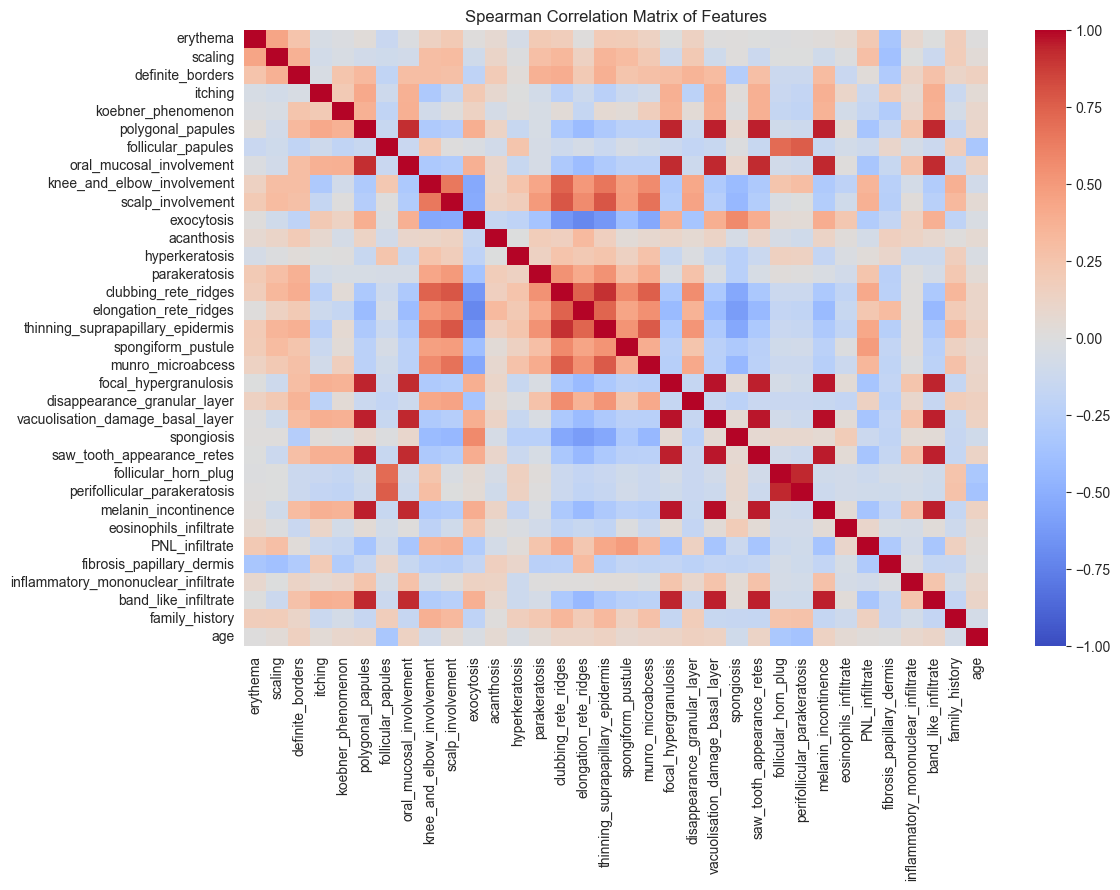

Top 10 feature correlations (absolute values):
 erythema                          erythema                            1.000000
vacuolisation_damage_basal_layer  melanin_incontinence                0.980545
                                  focal_hypergranulosis               0.969554
focal_hypergranulosis             melanin_incontinence                0.966728
saw_tooth_appearance_retes        vacuolisation_damage_basal_layer    0.965544
                                  melanin_incontinence                0.957328
polygonal_papules                 melanin_incontinence                0.952971
focal_hypergranulosis             saw_tooth_appearance_retes          0.952122
band_like_infiltrate              vacuolisation_damage_basal_layer    0.950678
polygonal_papules                 vacuolisation_damage_basal_layer    0.947975
band_like_infiltrate              saw_tooth_appearance_retes          0.947506
melanin_incontinence              band_like_infiltrate                0.947319
poly

In [15]:
#Correlation matrix:
correlation_matrix = df[all_features].corr(method='spearman')

# Visualize correlation matrix heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Spearman Correlation Matrix of Features')
plt.savefig('correlation_matrix_features_only.png')
plt.show()

print("Top 10 feature correlations (absolute values):\n", correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates()[:20])


There is heavy correlations between features that we should pursue 'Dimensionality Reduction' using PCA to reduce redundancy, there by improving model reliability. Moreover, the descriptive statistics suggest that the data is heavily skewed, hence, I would select Kruskal-wallis test to select robust groups for better modeling.

In [16]:
#Preparing data for PCA(Standardizing features)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X = df[all_features]
y = df['class']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [17]:
#PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [18]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)
cumulative_variance

array([0.27175631, 0.43301055, 0.52440268, 0.59005494, 0.62947821,
       0.66503556, 0.69528467, 0.72352661, 0.74918736, 0.77402041,
       0.79766973, 0.81914872, 0.83954171, 0.85910028, 0.87601594,
       0.8927078 , 0.90734921, 0.91979276, 0.93075121, 0.94049948,
       0.94906975, 0.95731475, 0.96461303, 0.97123145, 0.97677377,
       0.98079678, 0.98401936, 0.98698558, 0.98985773, 0.99266894,
       0.99523417, 0.99706026, 0.99869959, 1.        ])

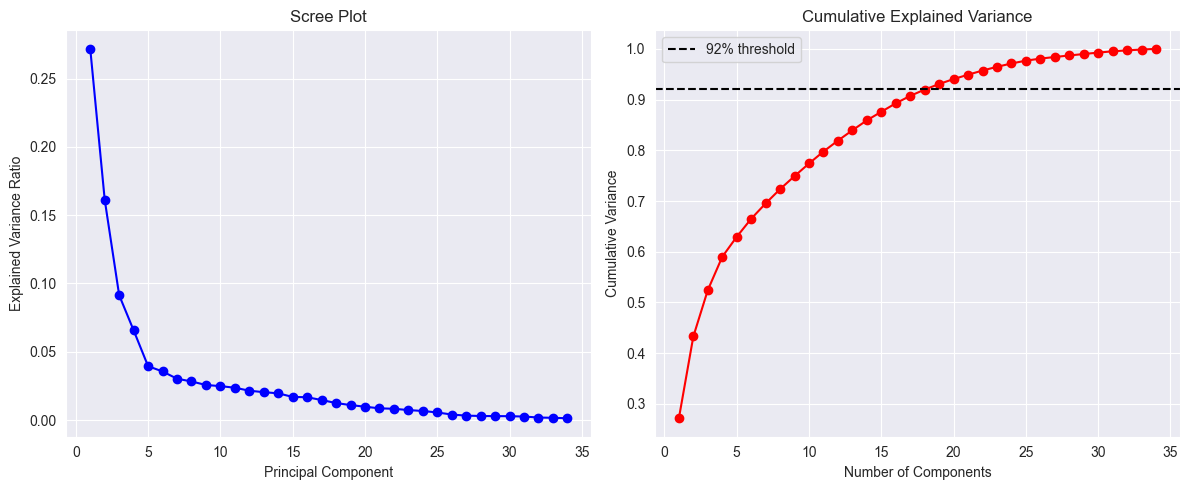

In [19]:
# Scree plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 'bo-')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')

plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'ro-')
plt.axhline(y=0.92, color='k', linestyle='--', label='92% threshold')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
plt.legend()
plt.tight_layout()
plt.show()

In [20]:
n_components_92 = np.argmax(cumulative_variance >= 0.92) + 1
print(f"Number of components for 92% variance: {n_components_92}")

Number of components for 92% variance: 19


In [21]:
pca_92 = PCA(n_components=n_components_92)
X_pca_92 = pca_92.fit_transform(X_scaled)
X_pca_92

array([[ 0.92894469, -2.58228429, -1.15357526, ...,  0.49771693,
        -1.3155948 ,  0.10824725],
       [-3.18265028,  1.97221974,  0.90679966, ..., -0.1575144 ,
        -0.35162266,  0.71663373],
       [ 5.23466388,  2.10104786,  0.59863202, ..., -0.68349772,
         0.5001038 ,  1.54388793],
       ...,
       [ 6.27949557,  3.01182706,  0.44297697, ..., -0.13307712,
        -0.25037347, -0.71740427],
       [ 5.47147639,  2.52235204,  0.32347779, ..., -0.07743588,
         0.26444651, -0.50547562],
       [-4.53929468,  3.14789864,  0.37679208, ...,  0.7446162 ,
        -0.05559559,  0.10598412]], shape=(366, 19))

In [22]:
# Feature importance analysis using individual statistical tests
from scipy.stats import f_oneway

feature_pvalues = {}
for feature in all_features:
    groups = [df[df['class'] == i][feature].values for i in range(1, 7)]
    # Remove empty groups
    groups = [g for g in groups if len(g) > 0]
    if len(groups) > 1:
        stat, pval = f_oneway(*groups)
        feature_pvalues[feature] = pval

# Sort by p-value (most discriminative first)
sorted_features = sorted(feature_pvalues.items(), key=lambda x: x[1])
print("Top 10 most discriminative features:")
for feat, pval in sorted_features[:10]:
    print(f"{feat}: p-value = {pval:.2e}")

Top 10 most discriminative features:
band_like_infiltrate: p-value = 4.14e-222
vacuolisation_damage_basal_layer: p-value = 5.21e-196
saw_tooth_appearance_retes: p-value = 5.41e-186
perifollicular_parakeratosis: p-value = 6.78e-185
polygonal_papules: p-value = 3.02e-175
melanin_incontinence: p-value = 1.45e-166
fibrosis_papillary_dermis: p-value = 3.09e-157
focal_hypergranulosis: p-value = 2.95e-153
oral_mucosal_involvement: p-value = 3.44e-139
clubbing_rete_ridges: p-value = 9.27e-139


In [23]:
#Employing Kruskal-wallis test,
from scipy.stats import kruskal

for i in range(n_components_92):
    groups = [X_pca_92[df['class'] == j, i] for j in range(1, 7)]
    if all(len(g) > 0 for g in groups):
        kw_result = kruskal(*groups)
        print(f"Kruskal-Wallis for PC{i+1}: H-statistic = {kw_result.statistic:.2f}, p-value = {kw_result.pvalue:.4f}")

Kruskal-Wallis for PC1: H-statistic = 329.08, p-value = 0.0000
Kruskal-Wallis for PC2: H-statistic = 285.71, p-value = 0.0000
Kruskal-Wallis for PC3: H-statistic = 247.16, p-value = 0.0000
Kruskal-Wallis for PC4: H-statistic = 240.34, p-value = 0.0000
Kruskal-Wallis for PC5: H-statistic = 79.09, p-value = 0.0000
Kruskal-Wallis for PC6: H-statistic = 50.16, p-value = 0.0000
Kruskal-Wallis for PC7: H-statistic = 10.34, p-value = 0.0661
Kruskal-Wallis for PC8: H-statistic = 2.59, p-value = 0.7623
Kruskal-Wallis for PC9: H-statistic = 7.92, p-value = 0.1606
Kruskal-Wallis for PC10: H-statistic = 6.18, p-value = 0.2888
Kruskal-Wallis for PC11: H-statistic = 30.34, p-value = 0.0000
Kruskal-Wallis for PC12: H-statistic = 13.19, p-value = 0.0217
Kruskal-Wallis for PC13: H-statistic = 4.79, p-value = 0.4420
Kruskal-Wallis for PC14: H-statistic = 18.46, p-value = 0.0024
Kruskal-Wallis for PC15: H-statistic = 11.79, p-value = 0.0378
Kruskal-Wallis for PC16: H-statistic = 1.84, p-value = 0.8707
Kr

Analysis : the above result suggests that PCs 1–6 and PCs 11, 12, 14, 15, 17 are explaining variance of the Class Variable. And the higher values of H-Statistic indicates stronger evidence that supports the PC selection we have done.


The result obtained from the Chi-Square test suggests that there is an association between family history and Class, therefore family history is found to be one of the factors in diagnosing the disease.

In [24]:
selected_pcs = [0, 1, 2, 3, 4, 5, 10, 11, 13, 14, 16]
X_selected_pcs = X_pca[:, selected_pcs]

In [25]:
from sklearn.model_selection import train_test_split

# --- Create Training and Test Sets ---
# We'll create two sets: one for the full features and one for PCA-reduced features.
# We use random_state=42 for reproducibility and stratify=y for the imbalance in the dataset.

# Set 1: Full Scaled Features
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# Set 2: PCA-Reduced Features
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(
    X_pca_92, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Full feature shape (X_train): {X_train.shape}")
print(f"PCA feature shape (X_pca_train): {X_pca_train.shape}")
print(f"Test set shape (y_test): {y_test.shape}")

Full feature shape (X_train): (256, 34)
PCA feature shape (X_pca_train): (256, 19)
Test set shape (y_test): (110,)


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

#Model 1: Logistic Regression on PCA Data
print(" 1. Logistic Regression (on PCA Features)")
log_reg = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
log_reg.fit(X_pca_train, y_pca_train)
y_pred_lr = log_reg.predict(X_pca_test)

print(f"Accuracy: {accuracy_score(y_pca_test, y_pred_lr):.4f}\n")
print("Classification Report:")
print(classification_report(y_pca_test, y_pred_lr))


# Model 2: Random Forest on Full Feature Data
# Random Forest is a powerful ensemble model that often works very well without needing PCA.
# It can capture complex patterns in the original 34 features.

print("\n2. Random Forest (on Full Features)")
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


# Model 3: Support Vector Classifier (SVC) on PCA Data
# SVCs are very effective in high-dimensional spaces, but PCA can speed them up.
# We'll use the 'rbf' kernel, which is great at finding non-linear patterns.

print("\n 3. Support Vector Classifier (on PCA Features) ")
svc = SVC(random_state=42, class_weight='balanced')
svc.fit(X_pca_train, y_pca_train)
y_pred_svc = svc.predict(X_pca_test)

print(f"Accuracy: {accuracy_score(y_pca_test, y_pred_svc):.4f}\n")
print("Classification Report:")
print(classification_report(y_pca_test, y_pred_svc))

 1. Logistic Regression (on PCA Features)
Accuracy: 0.9636

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        34
           2       0.89      0.89      0.89        18
           3       1.00      1.00      1.00        22
           4       0.87      0.87      0.87        15
           5       1.00      1.00      1.00        15
           6       1.00      1.00      1.00         6

    accuracy                           0.96       110
   macro avg       0.96      0.96      0.96       110
weighted avg       0.96      0.96      0.96       110


2. Random Forest (on Full Features)
Accuracy: 0.9727

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        34
           2       0.94      0.89      0.91        18
           3       1.00      1.00      1.00        22
           4       0.88      0.93      0.90        15
           5       1.00  

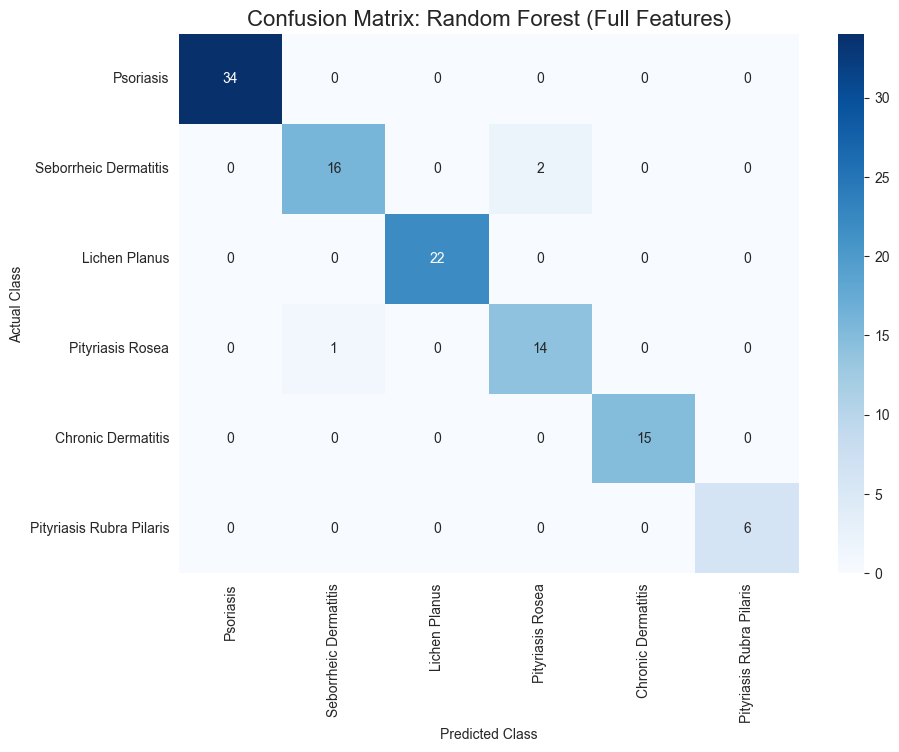

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix for the Random Forest model
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=[class_names[i] for i in sorted(y.unique())],
            yticklabels=[class_names[i] for i in sorted(y.unique())])
plt.title('Confusion Matrix: Random Forest (Full Features)', fontsize=16)
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

--- Starting GridSearchCV for Random Forest ---
Fitting 5 folds for each of 216 candidates, totalling 1080 fits

Best parameters found:
{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}

Accuracy (Tuned RF): 0.9818

Classification Report (Tuned RF):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        34
           2       0.94      0.94      0.94        18
           3       1.00      1.00      1.00        22
           4       0.93      0.93      0.93        15
           5       1.00      1.00      1.00        15
           6       1.00      1.00      1.00         6

    accuracy                           0.98       110
   macro avg       0.98      0.98      0.98       110
weighted avg       0.98      0.98      0.98       110



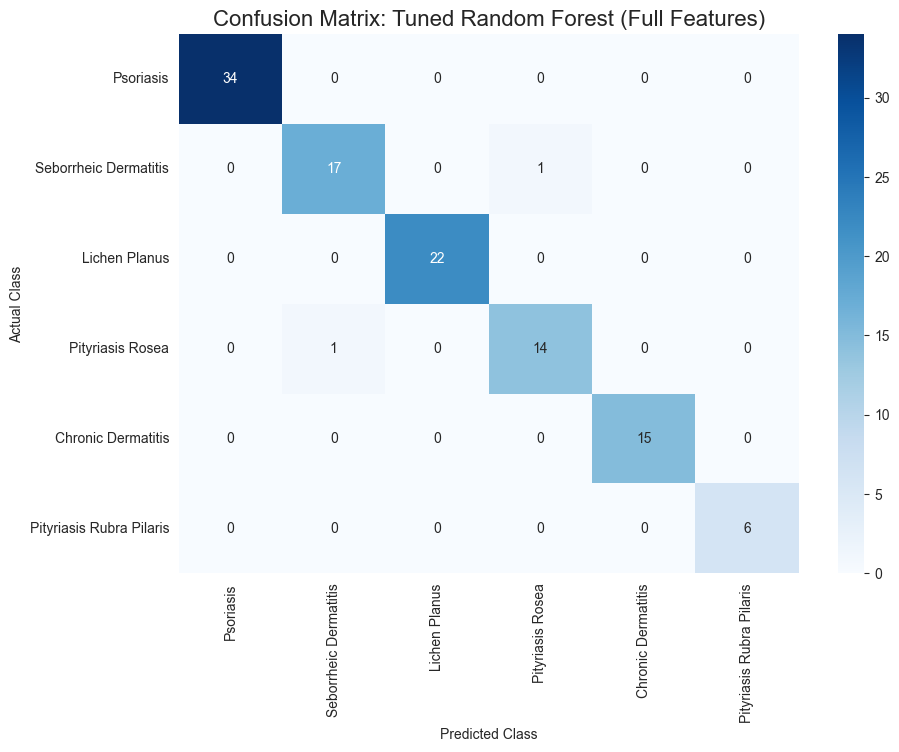

In [29]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
# These are just examples; you can add more parameters or values
param_grid_rf = {
    'n_estimators': [50, 100, 200],      # Number of trees
    'max_depth': [None, 10, 20, 30],      # Maximum depth of trees
    'min_samples_split': [2, 5, 10],      # Min samples required to split a node
    'min_samples_leaf': [1, 2, 4],        # Min samples required at a leaf node
    'criterion': ['gini', 'entropy']      # Function to measure split quality
}

# Create a Random Forest classifier instance (reuse your 'rf' setup)
rf_grid = RandomForestClassifier(random_state=42, class_weight='balanced')

# Set up GridSearchCV
# cv=5 means 5-fold cross-validation
# n_jobs=-1 uses all available CPU cores
# scoring='accuracy' (or 'f1_weighted' might be good for imbalance)
grid_search_rf = GridSearchCV(estimator=rf_grid, param_grid=param_grid_rf,
                              cv=5, n_jobs=-1, scoring='accuracy', verbose=1)

# Fit GridSearchCV to the training data (using the full features)
print("--- Starting GridSearchCV for Random Forest ---")
grid_search_rf.fit(X_train, y_train)

# Print the best parameters found
print("\nBest parameters found:")
print(grid_search_rf.best_params_)

# Evaluate the best model found by GridSearchCV on the test set
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf_tuned = best_rf_model.predict(X_test)

print(f"\nAccuracy (Tuned RF): {accuracy_score(y_test, y_pred_rf_tuned):.4f}\n")
print("Classification Report (Tuned RF):")
print(classification_report(y_test, y_pred_rf_tuned))

# Optional: Visualize Confusion Matrix for the tuned model
cm_rf_tuned = confusion_matrix(y_test, y_pred_rf_tuned)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_rf_tuned, annot=True, fmt='d', cmap='Blues',
            xticklabels=[class_names[i] for i in sorted(y.unique())],
            yticklabels=[class_names[i] for i in sorted(y.unique())])
plt.title('Confusion Matrix: Tuned Random Forest (Full Features)', fontsize=16)
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

#Overall Accuracy:

Logistic Regression (PCA): 96.36%

Random Forest (Full, Default): 97.27%

SVC (PCA): 95.45%

Random Forest (Full, Tuned): 98.18%

**Interpretation:** All models perform exceptionally well, indicating the features (both original and PCA-reduced) are highly effective at distinguishing these 6 skin diseases. The Tuned Random Forest achieved the highest accuracy (98.18%), suggesting that optimizing the hyperparameters provided a slight but meaningful improvement over the default settings. Using the full feature set seems slightly better than the PCA-reduced set for Random Forest in this case.